<a href="https://colab.research.google.com/github/FelipeNunesReis/House-rent-prediction/blob/main/Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df= pd.read_csv('/content/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
df.shape

(4746, 12)

In [3]:
median_rent = df.groupby('City')['Rent'].median()
city_with_highest_median_rent = median_rent.idxmax()
highest_median_rent_value = median_rent.max()

print(f"The city with the highest median rent is {city_with_highest_median_rent} with a median rent of {highest_median_rent_value}")

The city with the highest median rent is Mumbai with a median rent of 52000.0


In [4]:
import seaborn as sns

<Axes: xlabel='Bathroom', ylabel='Rent'>

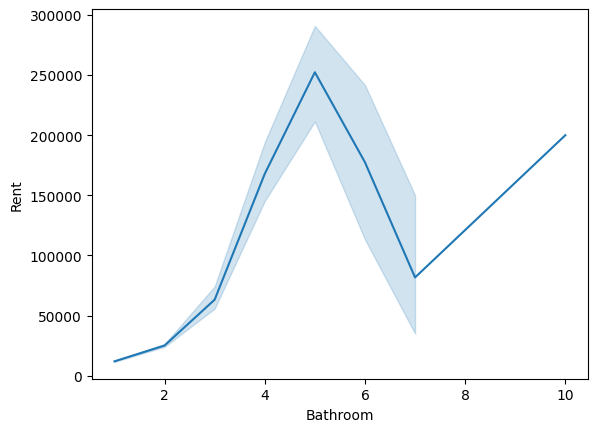

In [5]:
sns.lineplot(data=df, x= 'Bathroom',y='Rent')

<Axes: xlabel='Size', ylabel='Rent'>

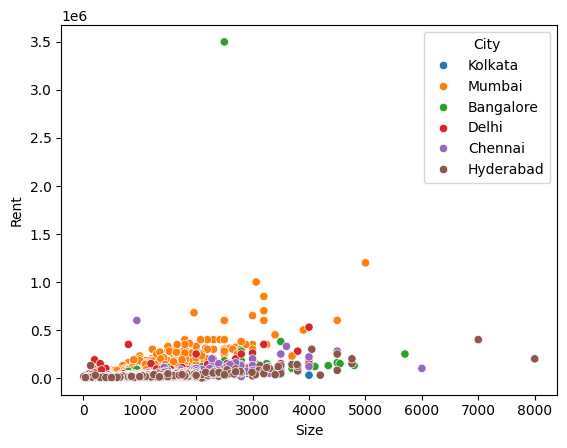

In [6]:
sns.scatterplot(data=df, x= 'Size',y='Rent', hue='City')

In [7]:
city_on_high_rent = df[df['Rent'] == df['Rent'].max()].groupby('City').size()
print(city_on_high_rent)

City
Bangalore    1
dtype: int64


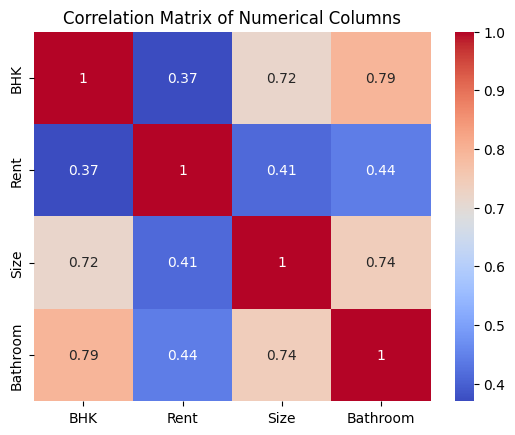

In [11]:
import matplotlib.pyplot as plt


df_correlation = df.corr(numeric_only=True)

sns.heatmap(df_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [12]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [16]:
import numpy as np

In [17]:
np.unique(df['City'])

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [18]:
np.sort(np.unique(df['Rent']))

array([   1200,    1500,    1800,    2000,    2200,    3000,    3200,
          3300,    3500,    3700,    3800,    3900,    4000,    4200,
          4300,    4500,    4600,    4700,    4750,    4800,    5000,
          5146,    5200,    5250,    5300,    5400,    5500,    5700,
          5800,    6000,    6166,    6200,    6250,    6300,    6500,
          6700,    6800,    6900,    7000,    7200,    7500,    7600,
          7700,    7900,    8000,    8200,    8500,    8900,    9000,
          9250,    9300,    9400,    9500,    9750,    9800,    9900,
         10000,   10500,   10677,   11000,   11200,   11400,   11500,
         12000,   12100,   12333,   12500,   13000,   13500,   13900,
         14000,   14500,   14900,   15000,   15500,   15723,   16000,
         16500,   17000,   17401,   17500,   17600,   17681,   18000,
         18500,   18999,   19000,   19397,   19411,   19500,   19800,
         20000,   20200,   20500,   21000,   21467,   21500,   22000,
         22500,   22

In [19]:
df['Rent_sqrt'] = np.sqrt(df['Rent'])
print(df[['Rent', 'Rent_sqrt']].head())

    Rent   Rent_sqrt
0  10000  100.000000
1  20000  141.421356
2  17000  130.384048
3  10000  100.000000
4   7500   86.602540


In [25]:
mean_size = np.mean(df['Size'])
print(f"\nAverage size: {mean_size: .2f}")

std_rent = np.std(df['Rent'])
print(f"Standard deviation of rent: {std_rent:.2f}")


Média do tamanho:  967.49
Desvio padrão do aluguel: 78098.18


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [84]:
from sklearn.model_selection import train_test_split
import pandas as pd

x = df[['Size', 'City']]
y = df['Rent']

x = pd.get_dummies(x, columns=['City'], drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
df_regression = LinearRegression()
df_regression.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = df_regression.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared of the model: {r2:.2f}")

R-squared of the model: 0.43


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Absolute Error (MAE): 26472.56
Mean Squared Error (MSE): 3230225226.08


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor(n_estimators=1000, random_state=42)

rf_regression.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [94]:
rf_y_pred = rf_regression.predict(x_test)

rf_r2 = r2_score(y_test, rf_y_pred)

print(f"R-squared of the Random Forest model: {rf_r2:.2f}")

R-squared of the Random Forest model: 0.17


In [96]:
y_pred = df_regression.predict(x_test)

print( y_pred[:5])

[ -1065.20324222 112363.22396728  33835.56469269  38960.10368455
  63918.61868713]


Data Loading and Exploration: We loaded the rental dataset and did some initial exploration.
Preprocessing: We handled the 'City' column by applying One-Hot Encoding to convert it into a numeric format suitable for the models.
Data Splitting: We separated the data into training (to train the models) and testing (to evaluate performance) sets.
Model Training and Evaluation:
We trained a Linear Regression model.
We evaluated the Linear Regression model using R-squared, Mean Absolute Error (MAE) and Mean Squared Error (MSE).
We trained a Random Forest Regressor model.
We evaluated the Random Forest Regressor model using R-squared.
Model Evaluation Results:

Linear Regression:
R-squared: 0.43
Mean Absolute Error (MAE): 26472.56
Mean Squared Error (MSE): 3230225226.08
Random Forest Regressor:
R-squared: 0.17
Based on the analysis, the Linear Regression model performed with an R-squared of 0.43 or 43%, while the Random Forest model performed with an R-squared of 0.17 or 17%. The MAE and MSE for Linear Regression provide an idea of ​​the mean error in the variances.